# Step 1: Step 1: Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Step 2: Load and Explore the Data

In [20]:
# Load dataset
df = pd.read_csv("customer_segmentation_data.csv")  # replace with actual file name
print(df.head())



   customer_id  age  gender  annual_income  spending_score  years_as_customer  \
0            1   33  Female        76668.0            78.8                2.4   
1            2   22  Female        58480.0            48.4                1.9   
2            3   20    Male        60546.0            68.5                1.4   
3            4   31    Male        37600.0            73.8                0.9   
4            5   39    Male        38380.0            27.3                0.7   

   purchases_per_year  avg_order_value preferred_channel   region  
0                  18              NaN            Online  Central  
1                  18           126.72            Online  Central  
2                  12           152.93            Online    South  
3                  12            85.39            Online     West  
4                  11            27.12              Both    South  


In [21]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         8000 non-null   int64  
 1   age                 8000 non-null   int64  
 2   gender              8000 non-null   object 
 3   annual_income       7920 non-null   float64
 4   spending_score      8000 non-null   float64
 5   years_as_customer   7920 non-null   float64
 6   purchases_per_year  8000 non-null   int64  
 7   avg_order_value     7920 non-null   float64
 8   preferred_channel   8000 non-null   object 
 9   region              8000 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 625.1+ KB
None


In [22]:
print(df.describe())

       customer_id          age  annual_income  spending_score  \
count   8000.00000  8000.000000    7920.000000     8000.000000   
mean    4000.50000    41.239000   51830.935859       52.988138   
std     2309.54541    14.863504   19870.546069       22.080658   
min        1.00000    18.000000   20000.000000        1.000000   
25%     2000.75000    29.000000   37147.750000       34.700000   
50%     4000.50000    39.000000   48219.000000       52.000000   
75%     6000.25000    53.000000   62180.750000       70.100000   
max     8000.00000    80.000000  132897.000000      100.000000   

       years_as_customer  purchases_per_year  avg_order_value  
count        7920.000000         8000.000000      7920.000000  
mean            3.930177           15.474375        84.943758  
std             2.976288            7.519602        50.545214  
min             0.100000            1.000000        10.000000  
25%             1.700000           10.000000        49.480000  
50%             3.100

In [15]:


# Basic statistics
print(df.describe())

       customer_id          age       gender  annual_income  spending_score  \
count   8000.00000  8000.000000  8000.000000    7920.000000     8000.000000   
mean    4000.50000    41.239000     0.506625   51830.935859       52.988138   
std     2309.54541    14.863504     0.499987   19870.546069       22.080658   
min        1.00000    18.000000     0.000000   20000.000000        1.000000   
25%     2000.75000    29.000000     0.000000   37147.750000       34.700000   
50%     4000.50000    39.000000     1.000000   48219.000000       52.000000   
75%     6000.25000    53.000000     1.000000   62180.750000       70.100000   
max     8000.00000    80.000000     1.000000  132897.000000      100.000000   

       years_as_customer  purchases_per_year  avg_order_value  \
count        7920.000000         8000.000000      7920.000000   
mean            3.930177           15.474375        84.943758   
std             2.976288            7.519602        50.545214   
min             0.100000    

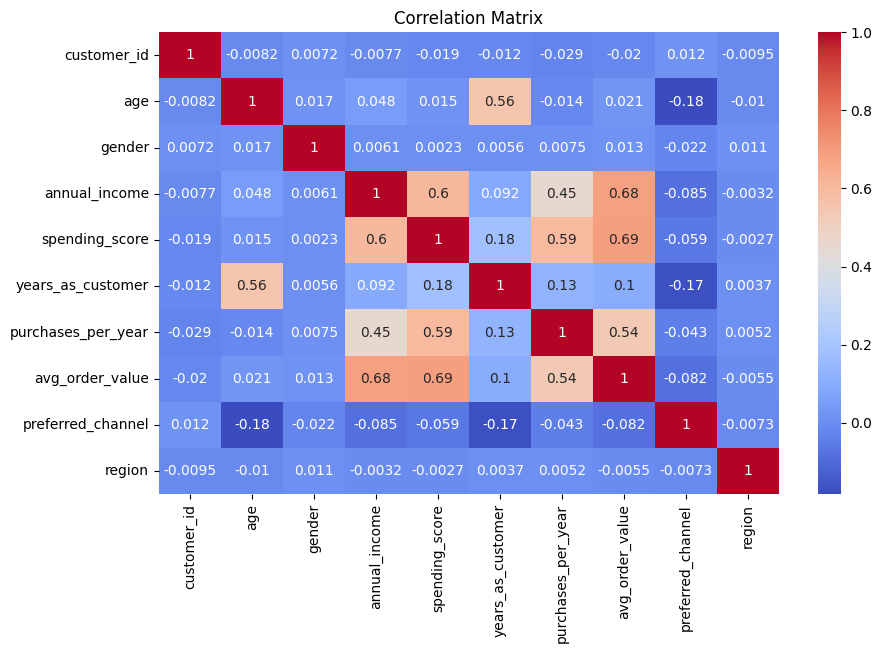

In [7]:
# Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 3: Data Preprocessing

In [24]:
# Drop Customer ID as it's not useful for clustering
df.drop('customer_id', axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

In [25]:
# Encode categorical features
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['preferred_channel'] = label_enc.fit_transform(df['preferred_channel'])
df['region'] = label_enc.fit_transform(df['region'])

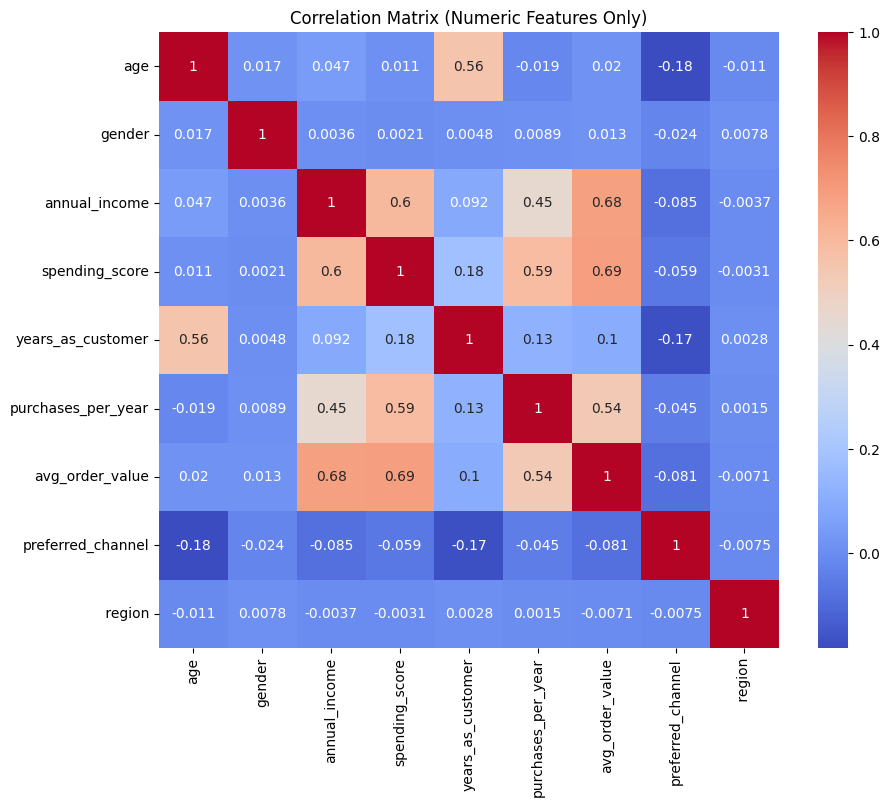

In [27]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# Apply scaling only on numeric columns
scaled_values = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled_values, columns=numeric_cols)


#  Step 4: Find Optimal Number of Clusters

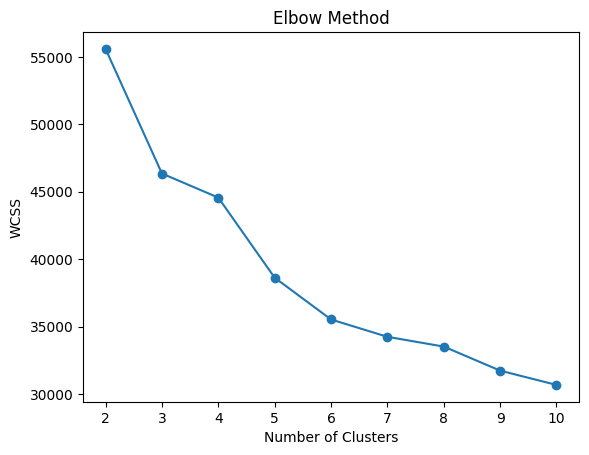

In [30]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


# Silhouette Score:

In [31]:
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    print(f"Silhouette Score for {i} clusters: {score:.3f}")


Silhouette Score for 2 clusters: 0.216
Silhouette Score for 3 clusters: 0.200
Silhouette Score for 4 clusters: 0.161
Silhouette Score for 5 clusters: 0.180
Silhouette Score for 6 clusters: 0.180
Silhouette Score for 7 clusters: 0.168
Silhouette Score for 8 clusters: 0.147
Silhouette Score for 9 clusters: 0.159
Silhouette Score for 10 clusters: 0.149


# Step 5: Apply K-Means Clustering (Assume Optimal K = 4)

In [32]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)


# Step 6: Analyze Cluster Characteristics

In [34]:
# Cluster size
print(df['Cluster'].value_counts())

# Mean values per cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='annual_income', y='spending_score', hue='Cluster', palette='Set2')
plt.title("Customer Clusters")
plt.show()


Cluster
0    4317
2    1418
3    1094
1     933
Name: count, dtype: int64


TypeError: agg function failed [how->mean,dtype->object]